<a href="https://colab.research.google.com/github/j-winfield/fastaidl/blob/master/Bearclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [3]:
from google.colab import files
files.upload()

Saving black_bears.txt to black_bears.txt
Saving grizzly_bears.txt to grizzly_bears.txt
Saving pandas.txt to pandas.txt


{'black_bears.txt': b'https://cdn2.iconfinder.com/data/icons/mammals-essentials/48/v-07-512.png,,,,,,,\nhttps://upload.wikimedia.org/wikipedia/commons/thumb/0/08/01_Schwarzb%C3%A4r.jpg/220px-01_Schwarzb%C3%A4r.jpg,,,,,,,\nhttps://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Ursus_americanusDetail.jpg/220px-Ursus_americanusDetail.jpg,,,,,,,\nhttps://static.inaturalist.org/photos/9364770/original.jpg?1545696123,,,,,,,\nhttps://www.discoverlife.org/IM/I_RB/0000/640/Ursus_americanus,I_RB44.jpg,,,,,,\nhttps://nhpbs.org/wild/images/blackbearusfw1med.jpg,,,,,,,\nhttps://www.nrri.umn.edu/sites/nrri.umn.edu/files/styles/panopoly_image_original/public/uram01.jpg?itok=YF2J7mfV,,,,,,,\nhttps://www.fs.fed.us/database/feis/animals/mammal/uram/bear.jpg,,,,,,,\nhttps://upload.wikimedia.org/wikipedia/commons/c/ca/Ursus_americanus_PO_06.jpg,,,,,,,\nhttps://mammals.carnegiemnh.org/wp-content/uploads/2018/04/Ursus_americanus_3303.jpg,,,,,,,\nhttps://live.staticflickr.com/8352/29013990470_22f8f88c78_b

In [0]:
folder="grizzly_bears"
file='grizzly_bears.txt'

In [0]:
path=Path('data/bears')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [0]:
folder="black_bears"
file='black_bears.txt'


In [0]:
path=Path('data/bears')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [0]:
folder="pandas"
file='pandas.txt'

In [0]:
path=Path('data/bears')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/bears/black_bears'),
 PosixPath('data/bears/pandas'),
 PosixPath('data/bears/grizzly_bears')]

In [0]:
!mv grizzly_bears.txt 'data/bears/grizzly_bears'

In [0]:
!mv black_bears.txt 'data/bears/black_bears'

In [0]:
!mv pandas.txt 'data/bears/pandas'

In [0]:
path=Path('data/bears')

In [0]:
classes=['black','grizzly','panda']

In [0]:
file = 'black_bears.txt'
download_images(path/'black_bears'/file, path/'black', max_pics = 250)

In [0]:
file = 'grizzly_bears.txt'
download_images(path/'grizzly_bears'/file, path/'grizzly', max_pics = 250)

In [0]:
file = 'pandas.txt'
download_images(path/'pandas'/file, path/'panda', max_pics = 250)

In [19]:
path.ls()

[PosixPath('data/bears/panda'),
 PosixPath('data/bears/black_bears'),
 PosixPath('data/bears/pandas'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/grizzly_bears')]

In [0]:
for c in classes: 
  verify_images(path/c,delete=True)

In [0]:
data=ImageDataBunch.from_folder(path,train='.',valid_pct=.2,ds_tfms=get_transforms(),size=224,bs=32,num_workers=4)  

In [22]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (157 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
panda,panda,panda,panda,panda
Path: data/bears;

Valid: LabelList (39 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,black,grizzly,panda
Path: data/bears;

Test: None

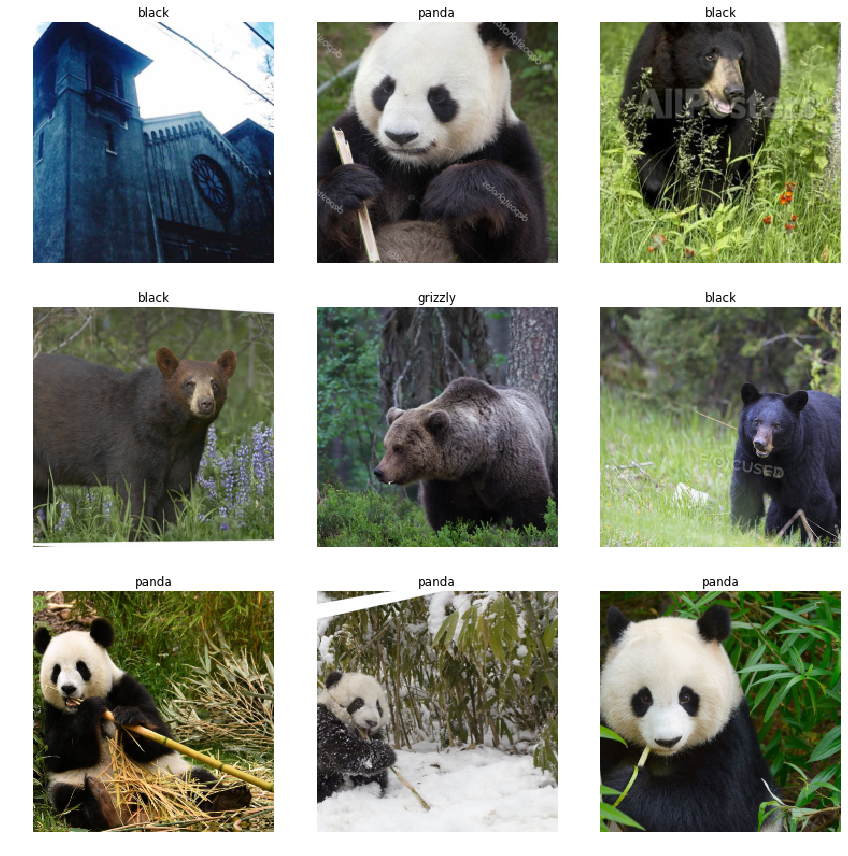

In [23]:
data.show_batch(rows=3)

In [24]:
data.classes , data.c,len(data.train_ds),len(data.valid_ds )

(['black', 'grizzly', 'panda'], 3, 157, 39)

In [25]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 52983181.12it/s]


In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.159153,0.480523,0.153846,00:10
1,0.683390,0.304623,0.128205,00:09
2,0.467636,0.345276,0.076923,00:08
3,0.370549,0.352973,0.076923,00:08


In [0]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


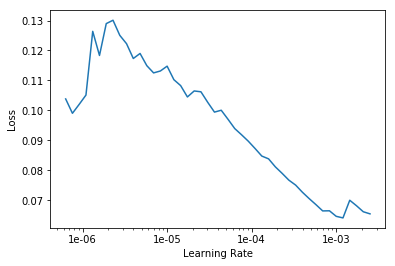

In [28]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (157 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
panda,panda,panda,panda,panda
Path: data/bears;

Valid: LabelList (39 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,black,grizzly,panda
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [37]:
learn.fit_one_cycle(4,max_lr=slice(6e-05,2e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.092751,0.381235,0.076923,00:09
1,0.107610,0.601249,0.076923,00:09
2,0.124132,0.661425,0.076923,00:08
3,0.099608,0.511740,0.076923,00:09


In [0]:
learn.save('stage-2')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

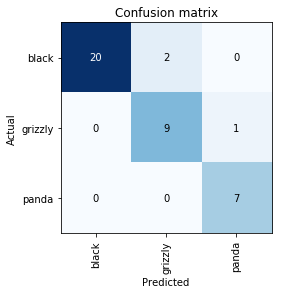

In [40]:
interp.plot_confusion_matrix()

In [41]:
interp.most_confused(min_val=2)

[('black', 'grizzly', 2)]

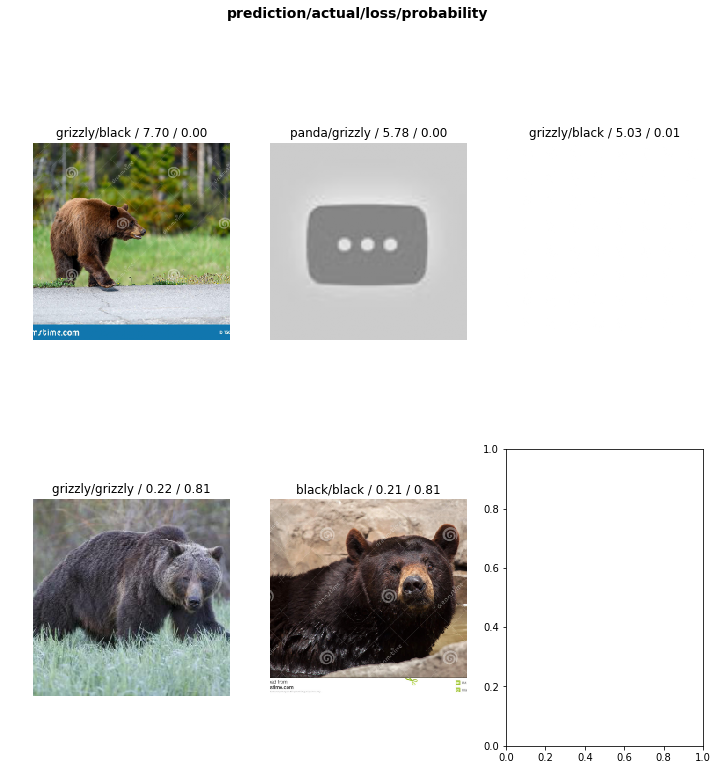

In [42]:
interp.plot_top_losses(5)

In [0]:
learn.export()

In [0]:
defaults.device=torch.device('cpu')

In [49]:
files.upload()

Saving 7P2A6608-1---Brad.jpg to 7P2A6608-1---Brad.jpg


{'7P2A6608-1---Brad.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\xff\xe1\x03shttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmpMM:OriginalDocumentID="B44D7AA6A6E96C19AAF10CE1536BB778" xmpMM:DocumentID="xmp.did:B0C5D597FB0411E8A22C91E4BA766C89" xmpMM:InstanceID="xmp.iid:B0C5D596FB0411E8A22C91E4BA766C89" xmp:CreatorTool="Adobe Photoshop CC 2019 Macintosh"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:f7cef766-daf2-407c-aa19-3ba99f7061b0" stRef:documentID="xmp.did:24716d68-b3d2-4982-

In [0]:
img=open_image('7P2A6608-1---Brad.jpg')

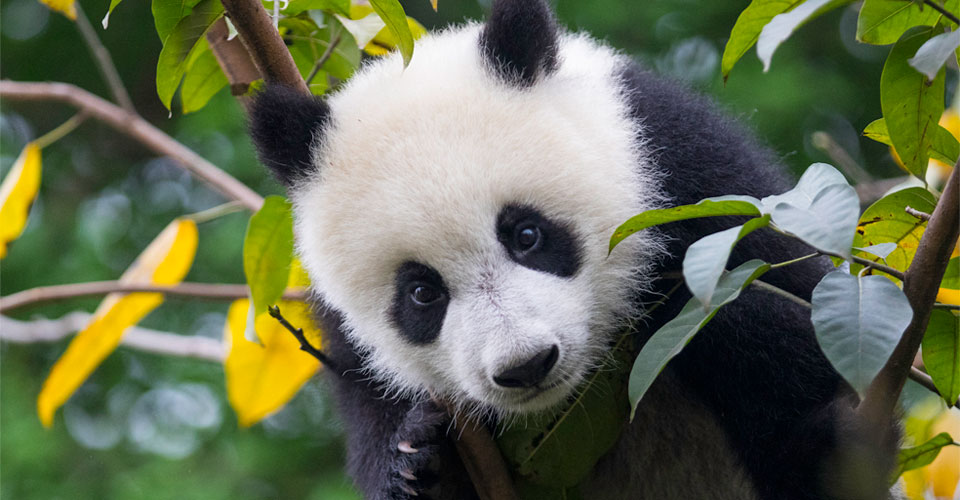

In [52]:
img


In [0]:
learn=load_learner(path)

In [53]:
path

PosixPath('data/bears')

In [55]:
pred_class,pred_idx,outputs=learn.predict(img)
pred_class

Category panda